# Visualization

# Data Wrangling and Cleaning

In [1]:
# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)


In [4]:
#Checking Null values
df.head()


,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3 Owners,"$14,990/yr",10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1 Owner,"$19,790/yr",24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2 Owners,"$14,500/yr",23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5 Owners,"$15,870/yr",22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1 Owner,"$27,810/yr",15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [3]:
cnx2 = sqlite3.connect('cars.db')

df2 = pd.read_sql_query("SELECT * FROM cars", cnx2)
df2.head()

,title,price,mileage,owners,depreciation,reg_date,coe_left,link
0,MERCEDES BENZ GLA180 (R18 BI),77000,68000,1,19896,5/1/2016,3.224658,https://www.motorist.sg/used-car/4676/mercedes...
1,LEXUS ES300H CVT,60800,156000,1,20152,23/10/2014,2.021918,https://www.motorist.sg/used-car/4675/lexus-es...
2,MERCEDES BENZ C 180 CGI,83800,131240,1,10482,12/10/2010,2.010959,https://www.motorist.sg/used-car/4674/mercedes...
3,PEUGEOT 3008 ACTIVE PURETECH 1.2 EAT6,79800,35000,1,14056,14/12/2017,5.164384,https://www.motorist.sg/used-car/4673/peugeot-...
4,HYUNDAI DM SANTA FE 2.4 GLS AT 4WD SR,70800,70731,1,19050,27/8/2015,2.865753,https://www.motorist.sg/used-car/4672/hyundai-...


In [ ]:
df.head()

In [5]:
# Removing string part from Owners and Depreciation 
df['owners'] = df['owners'].map(lambda x: x.lstrip('').rstrip('Owners'))
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('$').rstrip('/yr'))
df['depreciation'] = df['depreciation'].str.replace(',','')
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('Paper Value : $').rstrip(''))
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [6]:
# Converting Strings to integer columns (price	mileage	owners	depreciation)

df["price"] = pd.to_numeric(df["price"])
df["mileage"] = pd.to_numeric(df["mileage"])
df["owners"] = pd.to_numeric(df["owners"])
df["depreciation"] = pd.to_numeric(df["depreciation"])
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:
df2.head()

In [7]:
# Splitting coe_left in to individual Registration and coe_left columns
df[['reg_date','years_left']] = df.coe_left.str.split("(",expand=True)

In [8]:
# Changing coe_left from string object to Date 
df['years_left'] = df['years_left'].map(lambda x: x.lstrip('').rstrip('mths left)'))
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,years_left
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12,9yrs 5
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16,3yrs 10
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17,5yrs 1
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10,7yrs 4
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20,7yrs 11


In [9]:
df[['coe_year','coe_months']] = df.years_left.str.split("yrs ",expand=True)
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,years_left,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12,9yrs 5,9,5
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16,3yrs 10,3,10
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17,5yrs 1,5,1
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10,7yrs 4,7,4
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20,7yrs 11,7,11


In [10]:
df["coe_year"] = df['coe_year'].str.replace('yr','')

In [11]:
#Replacing nan  values
df = df.fillna(0)

In [12]:
df["coe_year"] = pd.to_numeric(df["coe_year"])
df["coe_months"] = pd.to_numeric(df["coe_months"])
df['coe_months'] = df['coe_months'].div(12)
df.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,years_left,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10 Oct 12,9yrs 5,9,0.416667
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,24 Aug 16,3yrs 10,3,0.833333
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7,23 Nov 17,5yrs 1,5,0.083333
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,22 Sep 10,7yrs 4,7,0.333333
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,15 Oct 20,7yrs 11,7,0.916667


In [13]:
df['years_left']= df[['coe_year','coe_months']].sum(axis=1)

In [14]:
df["reg_date"] = df['reg_date'].str.replace(' ','')

In [15]:
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d%b%y')
df.head()



,id,brand,model,website,price,mileage,owners,depreciation,coe_left,link,reg_date,years_left,coe_year,coe_months
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,2012-10-10,9.416667,9,0.416667
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,2016-08-24,3.833333,3,0.833333
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),/cars/toyota/wish/toyota-wish-1-8a/DO85O7,2017-11-23,5.083333,5,0.083333
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,2010-09-22,7.333333,7,0.333333
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,2020-10-15,7.916667,7,0.916667


In [18]:
df_cleaned = df[['id', 'brand', 'model', 'website', 'price', 'mileage', 'owners',
       'depreciation', 'coe_left','reg_date','years_left', 'link']]

In [19]:
df_cleaned.head()

,id,brand,model,website,price,mileage,owners,depreciation,coe_left,reg_date,years_left,link
0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),2012-10-10,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),2016-08-24,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),2017-11-23,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),2010-09-22,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),2020-10-15,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:
#Creating a cursor object using the cursor() method
cursor = cnx.cursor()

#Doping EMPLOYEE table if already exists
cursor.execute("DROP TABLE cars")
print("Table dropped... ")

In [ ]:
df_cleaned.to_sql(name='cars', con=cnx)

In [ ]:
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

In [ ]:

# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

In [1]:

# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)

#Checking Null values
#print(df.isnull().sum())
#df.head()
# Removing string part from Owners and Depreciation 
df['owners'] = df['owners'].map(lambda x: x.lstrip('').rstrip('Owners'))
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('$').rstrip('/yr'))
df['depreciation'] = df['depreciation'].str.replace(',','')
df['depreciation'] = df['depreciation'].map(lambda x: x.lstrip('Paper Value : $').rstrip(''))
#df.head()

# Converting Strings to integer columns (price	mileage	owners	depreciation)

df["price"] = pd.to_numeric(df["price"])
df["mileage"] = pd.to_numeric(df["mileage"])
df["owners"] = pd.to_numeric(df["owners"])
df["depreciation"] = pd.to_numeric(df["depreciation"])
# df.head()

# Splitting coe_left in to individual Registration and coe_left columns
df[['reg_date','years_left']] = df.coe_left.str.split("(",expand=True)
# Changing coe_left from string object to Date 
df['years_left'] = df['years_left'].map(lambda x: x.lstrip('').rstrip('mths left)'))
df.head()
df[['coe_year','coe_months']] = df.years_left.str.split("yrs ",expand=True)
df.head()
df["coe_year"] = df['coe_year'].str.replace('yr','')
#Replacing nan  values
df = df.fillna(0)
df["coe_year"] = pd.to_numeric(df["coe_year"])
df["coe_months"] = pd.to_numeric(df["coe_months"])
df['coe_months'] = df['coe_months'].div(12)
df.head()
df['years_left']= df[['coe_year','coe_months']].sum(axis=1)
df["reg_date"] = df['reg_date'].str.replace(' ','')
df['reg_date'] = pd.to_datetime(df['reg_date'], format='%d%b%y')
df.head()


df_cleaned = df[['id', 'brand', 'model', 'website', 'price', 'mileage', 'owners',
       'depreciation', 'coe_left','reg_date','years_left', 'link']]
df_cleaned.head()
#Creating a cursor object using the cursor() method
cursor = cnx.cursor()

#Replacing Dirty car table with clean data
cursor.execute("DROP TABLE cars")

df_cleaned.to_sql(name='cars', con=cnx)
df = pd.read_sql_query("SELECT * FROM cars", cnx)
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,coe_left,reg_date,years_left,link
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),2012-10-10 00:00:00,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),2016-08-24 00:00:00,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),2017-11-23 00:00:00,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),2010-09-22 00:00:00,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),2020-10-15 00:00:00,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling and Cleaning
# Importing libraries
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)

In [ ]:
df.head()

In [ ]:
df.reg_date.unique()

In [ ]:
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

Plotting Counts for each Brand:  None


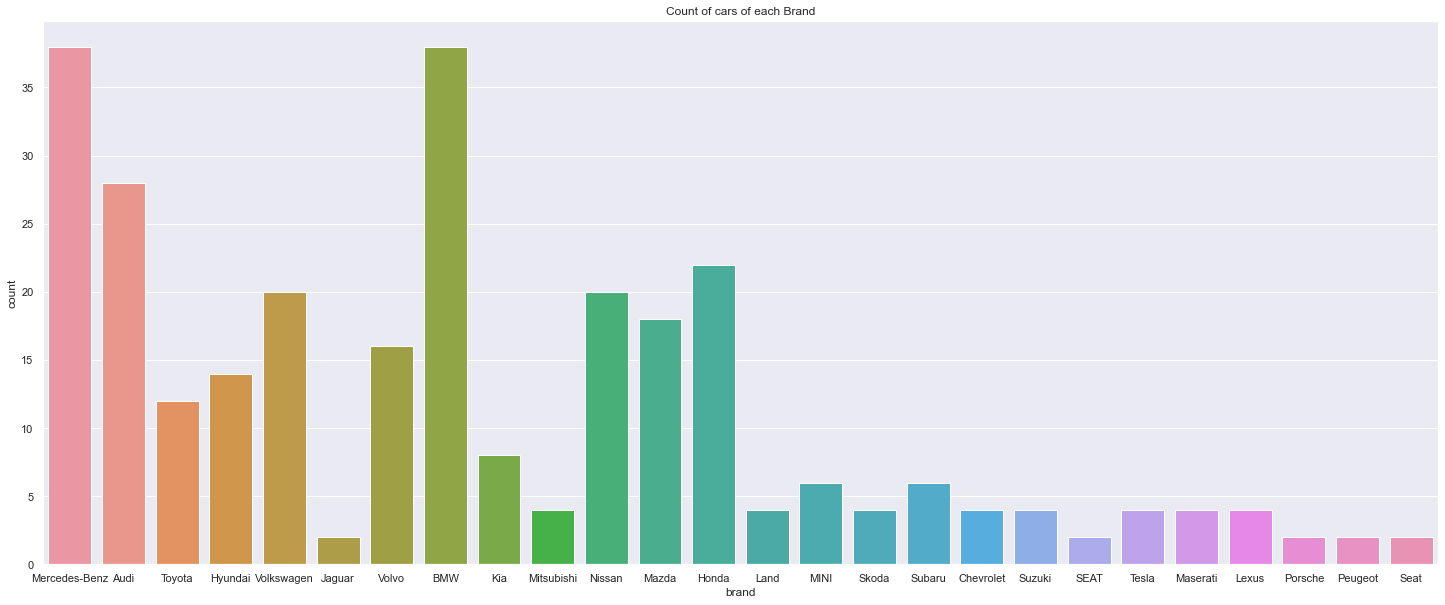

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
# Creating sqlite connection.
cnx = sqlite3.connect('Carsupdate.db')
# Reading data in to dataframe
df = pd.read_sql_query("SELECT * FROM cars", cnx)

#changing reg_date to datetime type
df.reg_date=pd.to_datetime(df.reg_date)
now = pd.to_datetime('now')
now
df['age']= (now.year - df['reg_date'].dt.year)


# countplots function
def countplot(feature,df):
    sns.set(rc={'figure.figsize':(25,10)})
    sns.countplot(x=feature, data=(df)).set(title='Count of cars of each Brand')



print('Plotting Counts for each Brand: ', countplot(df.brand,df))
#print('Plotting Counts for each Age: ', countplot(df.age,df))


In [ ]:
sns.set(rc={'figure.figsize':(25,10)})
sns.countplot(x="brand", data=(df)).set(title='Count of cars of each Brand')

In [ ]:
df.groupby('brand')['price'].mean().plot.bar()
plt.title('Average Price of each Brand')
plt.legend(loc="upper left")

In [ ]:
def barplots(a,b,df):
    df.groupby(a)[b].mean().plot.bar()
    plt.title('Average '+b+ ' of each '+a)
    plt.legend(loc="upper left")

barplots('brand','mileage',df)

In [ ]:
df.groupby('brand')['mileage'].mean().plot.bar()
plt.title('Average Mileage of each Brand')
plt.legend(loc="upper left")

In [ ]:
df.groupby('brand')['owners'].mean().plot.bar()
plt.title('Average number of owners of each Brand')
plt.legend(loc="upper left")

In [ ]:
df.columns

In [ ]:
df.owners.value_counts()

In [ ]:
df.to_csv('data.csv')

In [ ]:
df.owners.value_counts()

In [ ]:
a = df.owners.value_counts()
a


In [ ]:
values=df['brand'].value_counts(dropna=True)

In [ ]:

plt.pie(df.owners.value_counts(), autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.owners.value_counts().index)
plt.title('Division of cars by number of Brands')

In [ ]:
values

In [ ]:
plt.pie(df.brand.value_counts(), autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.brand.value_counts().index)  
plt.title('Division of cars by number of Brands')

In [ ]:
df.columns

In [ ]:
#changing reg_date to datetime type
df.reg_date=pd.to_datetime(df.reg_date)

In [ ]:
#changing reg_date to datetime type
df.reg_date=pd.to_datetime(df.reg_date)
now = pd.to_datetime('now')
now
df['age']= (now.year - df['reg_date'].dt.year)

In [4]:
df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,coe_left,reg_date,years_left,link,age
0,0,1,Mercedes-Benz,SLK-Class SLK250 (COE till 03/2032),Carro,170888,55000,3,14990,10 Oct 12 (9yrs 5mths left),2012-10-10,9.416667,/cars/mercedes-benz/slk/mercedes-benz-slk-clas...,10
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),2016-08-24,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,6
2,2,3,Toyota,Wish 1.8A,Carro,83888,41610,2,14500,23 Nov 17 (5yrs 1mths left),2017-11-23,5.083333,/cars/toyota/wish/toyota-wish-1-8a/DO85O7,5
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),2010-09-22,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,12
4,4,5,Mercedes-Benz,GLC-Class GLC300 Mild Hybrid AMG Line 4MATIC,Carro,255888,41962,1,27810,15 Oct 20 (7yrs 11mths left),2020-10-15,7.916667,/cars/mercedes-benz/glc300/mercedes-benz-glc-c...,2


In [6]:
filtered_df = df[df['brand'] == 'Audi']
filtered_df.head()

,index,id,brand,model,website,price,mileage,owners,depreciation,coe_left,reg_date,years_left,link,age
1,1,2,Audi,Q5 2.0A TFSI Quattro,Carro,97888,118480,1,19790,24 Aug 16 (3yrs 10mths left),2016-08-24,3.833333,/cars/audi/q5/audi-q5-2-0a-tfsi-quattro/DR8WRP,6
3,3,4,Audi,S5 Sportback 3.0A TFSI Quattro (COE till 02/2030),Carro,116888,163562,5,15870,22 Sep 10 (7yrs 4mths left),2010-09-22,7.333333,/cars/audi/s5/audi-s5-sportback-3-0a-tfsi-quat...,12
7,7,8,Audi,A3 Sedan 1.0A TFSI S-tronic,Carro,75888,81000,3,15720,25 Jan 17 (4yrs 3mths left),2017-01-25,4.250000,/cars/audi/a3/audi-a3-sedan-1-0a-tfsi-s-tronic...,5
15,15,16,Audi,Q3 1.4A TFSI S-tronic,Carro,165888,22024,1,17880,16 Mar 21 (8yrs 4mths left),2021-03-16,8.333333,/cars/audi/q3/audi-q3-1-4a-tfsi-s-tronic/DO8O62,1
23,23,24,Audi,Q3 1.4A TFSI S-tronic,Carro,165888,16210,1,18340,30 Dec 20 (8yrs 2mths left),2020-12-30,8.166667,/cars/audi/q3/audi-q3-1-4a-tfsi-s-tronic/DL8YJ6,2


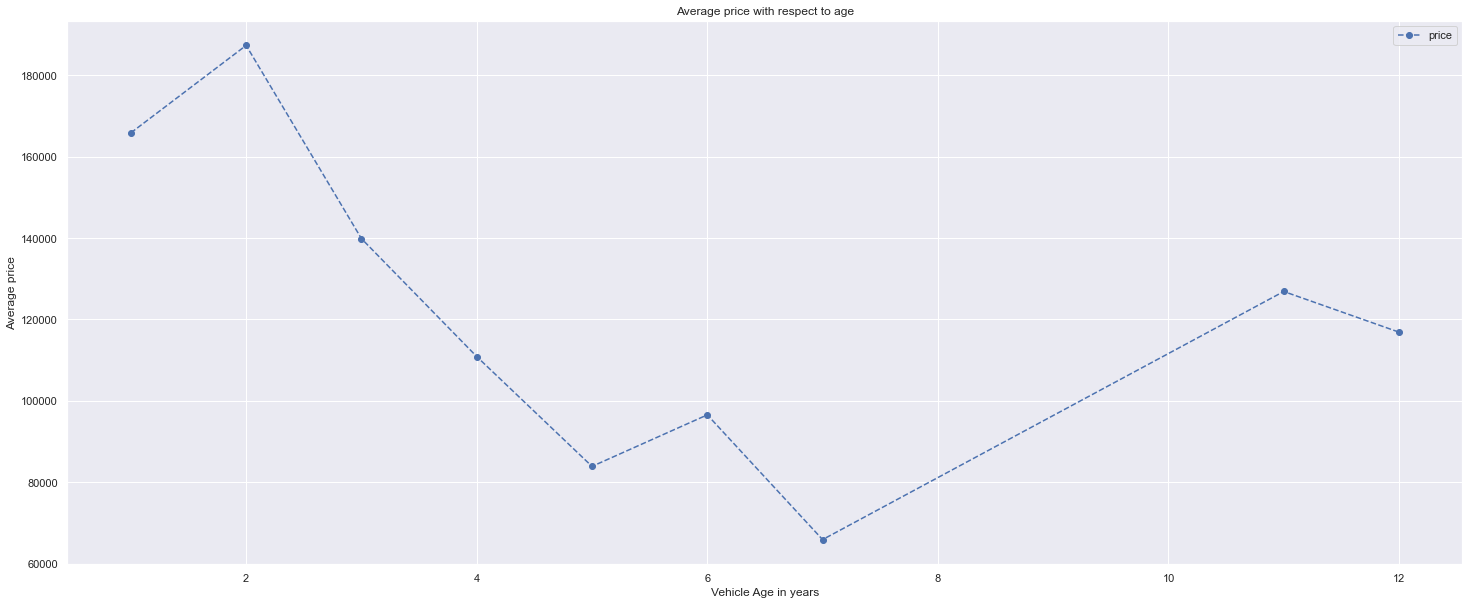

In [7]:

filtered_df.groupby('age')['price'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average price with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average price')
plt.legend()

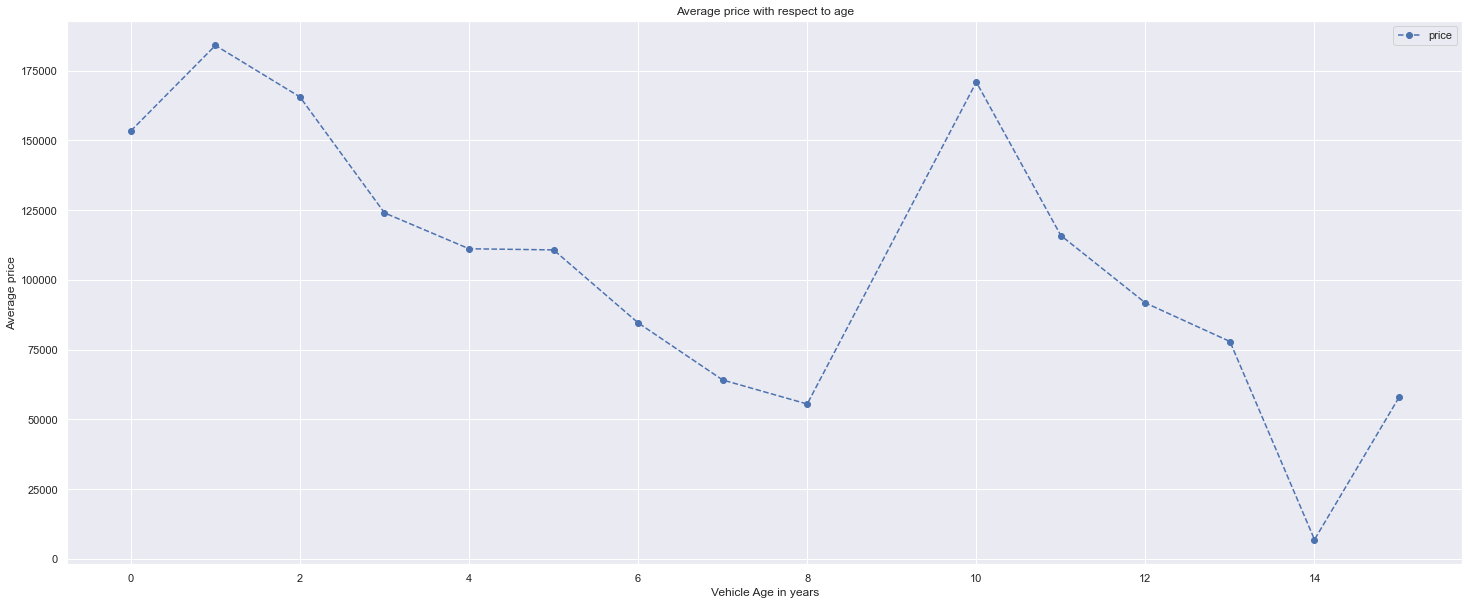

In [3]:

df.groupby('age')['price'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average price with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average price')
plt.legend()

In [ ]:
df.columns

In [ ]:
df.groupby('age')['mileage'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average Mileage with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average Mileage')
plt.legend()

In [ ]:
df.groupby('age')['depreciation'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average depreciation with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average depreciation')
plt.legend()

In [ ]:
df.groupby('age')['coe_left'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average coe_left with respect to age')
plt.xlabel('Vehicle Age in years')
plt.ylabel('Average coe_left')
plt.legend()

In [ ]:
df.groupby('brand')['depreciation'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average depreciation with respect to Brand')
plt.xlabel('Brand of car')
plt.ylabel('Average depreciation')
plt.legend()

In [ ]:

df.groupby('brand')['coe_left'].mean().plot(kind='line', linestyle='--', marker='o', color='b',)
plt.title('Average coe_left with respect to Brand')
plt.xlabel('Brand of Car')
plt.ylabel('Average coe_left')
plt.legend()

In [ ]:
plt.pie(df.age.value_counts(), autopct= lambda x: '{:.0f}'.format(x*values.sum()/100), startangle=90)
plt.legend(df.age.value_counts().index)  
plt.title('Division of cars by Age')

In [ ]:
# Density plot for number of owners
sns.kdeplot(data=df, x=df.owners).set(title='Density of cars by Number of Owners')

In [ ]:
# Density plot for cars by Age
sns.kdeplot(data=df, x=df.age).set(title='Density of cars by Age')

In [ ]:
# Density plot for Price of cars
sns.kdeplot(data=df, x=df.price).set(title='Density of cars Price')

In [ ]:
sns.scatterplot(data=df, x="brand", y="price").set(title='Scatter Plot of cars Price')

In [ ]:
df.columns

In [ ]:
sns.scatterplot(data=df, x="brand", y="depreciation").set(title='Scatter Plot of cars Deprecation')

In [ ]:

sns.relplot(data=df, x="price", y="brand", row="owners", height = 8).set(title='Comparison of Prices of Brands by Number of owners')


In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.ecdfplot(data=df, y="owners").set(title='Proportion Division by numer of Owners')


In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.ecdfplot(data=df, y="brand").set(title='Proportion Division by Brands')


In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
sns.ecdfplot(data=df, y="age").set(title='Proportion Division by Age of Car')


In [ ]:
sns.catplot(data=df, x="owners", y="brand", kind="box").set(title='Boxplot of Brands by number of owners')

In [ ]:
sns.catplot(data=df, x="age", y="brand", kind="box").set(title='Boxplot of Brands by Age of car')

In [ ]:
sns.stripplot(data=df, y="brand", x="price").set(title='Strip plot of Car Brands and Prices')

In [ ]:
sns.stripplot(data=df, y="brand", x="depreciation").set(title='Strip plot of Car Brands and depreciation')

In [ ]:
sns.stripplot(data=df, x="age", y="depreciation").set(title='Strip plot of Car Age and depreciation')

In [ ]:
sns.violinplot(data=df, x="age", y="depreciation").set(title='Violon plot of Car Age and depreciation')

In [ ]:
sns.violinplot(data=df, x="owners", y="price").set(title='violin plot of Owners and Price')

In [ ]:
sns.violinplot(data=df, x="owners", y="depreciation").set(title='violin plot of Owners and depreciation')

In [ ]:
sns.lmplot(data=df, y="price", x="depreciation").set(title='Relation between Price and depreciation')

In [ ]:
sns.lmplot(data=df, x="age", y="depreciation").set(title='Relation between Age and depreciation')

In [ ]:
sns.lmplot(data=df, x="mileage", y="depreciation").set(title='Relation between Mileage and depreciation')

In [ ]:
sns.lmplot(data=df, x="mileage", y="age").set(title='Relation between Age of cars and depreciation')

In [ ]:
sns.lmplot(data=df, y="mileage", x="owners").set(title='Relation between Age of Cars and Owners')

In [ ]:

heatmap1_data = pd.pivot_table(df, values='mileage', 
                     index=['brand'], 
                     columns='age')
sns.heatmap(heatmap1_data).set(title='Heatmap of each Brand with respect to age and Price')


In [ ]:
def plot1():
    heatmap1_data = pd.pivot_table(df, values='mileage', 
                     index=['brand'], 
                     columns='age')
    sns.heatmap(heatmap1_data).set(title='Heatmap of each Brand with respect to age and Price')

def lineplot():
    sns.lmplot(data=df, y="mileage", x="owners").set(title='Relation between Age of Cars and Owners')

print('plt1',plot1())

print(lineplot())
    